<a href="https://colab.research.google.com/github/LeaCarop/Clasificador_img_API_secuencial/blob/main/Clasificador_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLASIFICADOR DE IMÁGENES USANDO LA API SECUENCIAL**
### Conjunto de prueba para uso de Keras

In [43]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.8.0'

In [44]:
# Dataset fashion_mnistd
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [45]:
x_train_full.shape # dimensiones de x: 60.000 imágenes de 28x28 píxeles cada una

(60000, 28, 28)

In [46]:
y_train_full.dtype

dtype('uint8')

Creo un conjunto de validación y escalo la intensidad de los píxeles hasta el rango 0-1 ya que voy a entrenar la red con descenso de gradiente.

In [47]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0    # conjunto de 5.000 imágenes para validación
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [48]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]   # lista de clases que hay en el dataset

In [49]:
class_names[y_train[5]]   # tipo de clase que es la imagen 5

'Ankle boot'

 ### CREAR MODELO

In [50]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28, 28]), # flatten aplana la imágen, pasa de 2D a 1D
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")  # activación softmax en la capa de salida porque es un problema multiclase
]) 


In [51]:
model.summary()  # muestra todas las capas y el # de parámetros

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* Capa dense ---> 784*300 pesos de conexión + 300 de sesgo = 235.500
* Capa dense_1 ---> 300*100 pesos de conexión + 100 de sesgo = 30.100
* Capa dense_2 ---> 100*10 pesos de conexión + 10 de sesgo = 1.010 parámetros.

### COMPILAR MODELO

In [52]:
model.compile(loss="sparse_categorical_crossentropy",  # usamos números entreros en las etiquetas de 0 a 9
              optimizer = keras.optimizers.SGD(lr=0.01),  # el optimizador utilizado es el descenso de gradiente estocático
              metrics = ["accuracy"])   # para medir la exactitud del modelo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

In [53]:
history = model.fit(x_train, y_train, epochs=35,
                    validation_data = (x_valid, y_valid))

Epoch 1/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7176 - accuracy: 0.7637 - val_loss: 0.5293 - val_accuracy: 0.8226
Epoch 2/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4877 - accuracy: 0.8297 - val_loss: 0.4499 - val_accuracy: 0.8452
Epoch 3/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4437 - accuracy: 0.8439 - val_loss: 0.4134 - val_accuracy: 0.8584
Epoch 4/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4164 - accuracy: 0.8541 - val_loss: 0.3940 - val_accuracy: 0.8674
Epoch 5/35
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3958 - accuracy: 0.8605 - val_loss: 0.3886 - val_accuracy: 0.8664
Epoch 6/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3778 - accuracy: 0.8658 - val_loss: 0.3897 - val_accuracy: 0.8668
Epoch 7/35
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3646 - accuracy: 0.8709 - val_loss: 0.3665 - val_accuracy:

No aparece haber mucho sobreajuste en el modelo, la exactitud en validación es de 88,60% tras 30 repeticiones, mientras que la eaxctitud en entrenamiento es de 92,53%.

No obstante, por probar, voy a reemplazar el parámetro validation_data por validation_split indicando un 10% para que Keras use el último 10% de los datos antes de mezclaros para validar.

In [55]:
history1 = model.fit(x_train, y_train, epochs=30,
                    validation_split = 0.1)

Epoch 1/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.2054 - accuracy: 0.9271 - val_loss: 0.2069 - val_accuracy: 0.9216
Epoch 2/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.2020 - accuracy: 0.9286 - val_loss: 0.2045 - val_accuracy: 0.9262
Epoch 3/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.1973 - accuracy: 0.9303 - val_loss: 0.2233 - val_accuracy: 0.9147
Epoch 4/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.1958 - accuracy: 0.9300 - val_loss: 0.2225 - val_accuracy: 0.9182
Epoch 5/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.1912 - accuracy: 0.9322 - val_loss: 0.2131 - val_accuracy: 0.9213
Epoch 6/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.1876 - accuracy: 0.9324 - val_loss: 0.2232 - val_accuracy: 0.9175
Epoch 7/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.1849 - accuracy: 0.9342 - val_loss: 0.2170 - val_accuracy:

El resultado obtenido al cambiar el argumento de validación ha sido positivo a primera vista. Consiguiendo un aumento de la exactitud en validación de casi 2% con respecto al anterior entrenamiento (val_accuracy = 0.9111).

In [32]:
# history.epoch
# history.params
# history.history

<function matplotlib.pyplot.show>

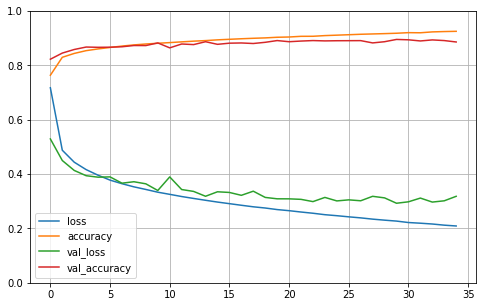

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # rango vertical
plt.show

Al trazar la curva de entrenamiento se observa un poco de overfitting. Daso que ahora solo estoy probando Keras no voy a realizar cambio en los hiperparámetros. 

In [58]:
model.evaluate(x_test, y_test)   # evaluar el modelo con el conjunto de prueba

313/313 [==============================] - 1s 4ms/step - loss: 89.5002 - accuracy: 0.8415


[89.50021362304688, 0.8414999842643738]

Al evaluar el modelo con el conjunto de prueba se obtiene un rendimiento ligeramiento inferior al obtenido en entrenamiento, lo que es habitual que sea así, ya que los hiperparámetros están ajustados com el cojunto de train y no de test. 
No se deben ajustar hiperparámetros en test porque la estimación del error no será real.

### HACER PREDICCIONES

Puedo usar el método predict() para hacer predicciones en el caso de haber instancias nuevas, como no es el caso, probaré con algunas del conjunto de prueba. 

In [67]:
x_new = x_test[:5]
y_prueba = model.predict(x_new)
y_prueba.round(4) # me devuelve un array con la probabilidad calculada por clase

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

El array que devuelve el código anterior se interpreta de la sigte forma:
* Cada línea tiene 10 valores que representan las clases que van de 0 a 9
* El array devuelve las predicciones para 5 imágenes
* El orden de clases es: 
 * T-shirt/top
 * Trouser 
 * Pullover
 * Dress
 * Coat
 * Sandal
 * Shirt
 * Sneaker
 * Bag 
 * Ankle boot

Siguiendo este orden y, teniendo en cuenta los valores que devuelve el array, cada imágen pertenece respectivamente a la clase: 
* Ankle boot
* Pullover
* Trouser
* Trouser
* Sandal

En este caso, las probabilidades son bastante claras de que es una clase en concreto, no siempre es así.

In [73]:
import numpy as np

y_hat = np.argmax(model.predict(x_new), axis=-1)
y_hat    # en vez de un array como en el código anterior me devuelve la clase de la imágen

array([9, 2, 1, 1, 6])

In [74]:
np.array(class_names)[y_hat]  # coincide con lo escrito anteriormente

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [75]:
y_new = y_test[:5]
y_new  # pruebo si la predicción realizada es correcta. EN ESTE CASO SÍ LO ES.

array([9, 2, 1, 1, 6], dtype=uint8)

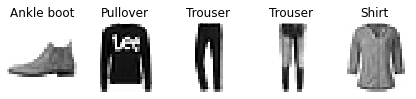

In [79]:
# Representación de las imágenes
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()